## Berthine Nyunga_Autoencoder_Tutorial

In [33]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [34]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [28]:
bs = 1000 #batch_size

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

In [4]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [5]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
model_ae = AutoEncoder()

In [7]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0431
epoch [2/10], loss:0.0314
epoch [3/10], loss:0.0264
epoch [4/10], loss:0.0236
epoch [5/10], loss:0.0212
epoch [6/10], loss:0.0199
epoch [7/10], loss:0.0182
epoch [8/10], loss:0.0178
epoch [9/10], loss:0.0172
epoch [10/10], loss:0.0173


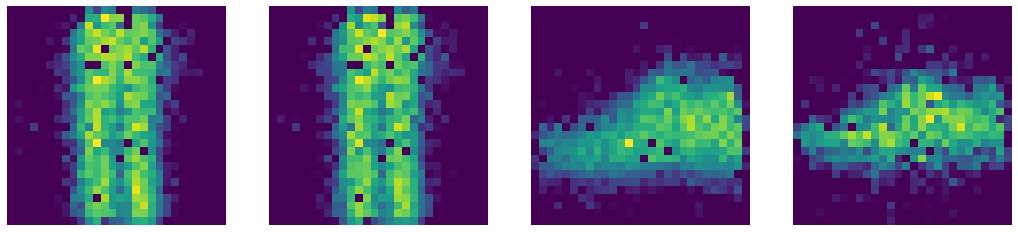

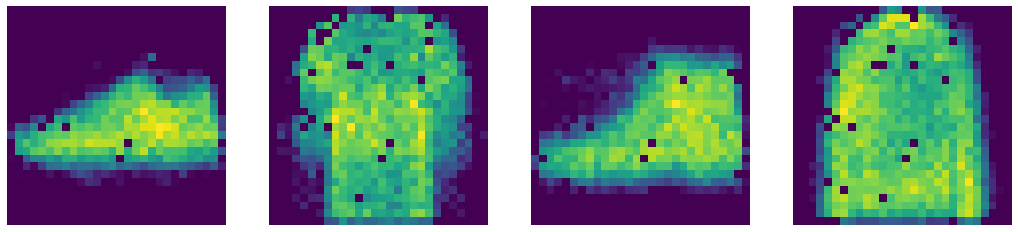

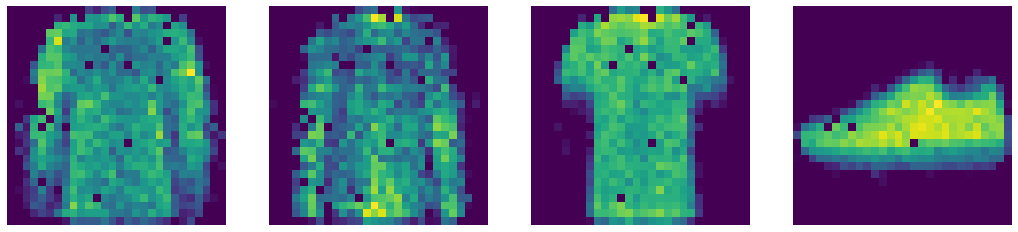

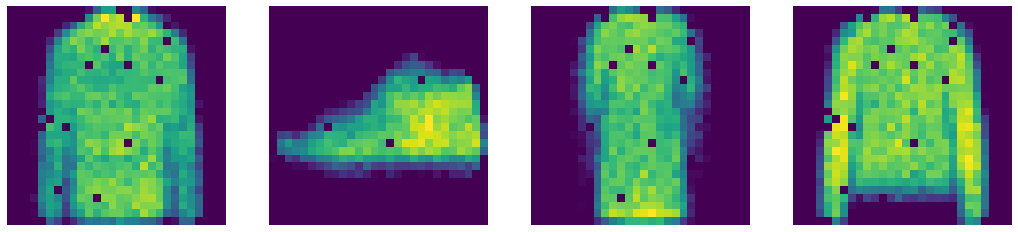

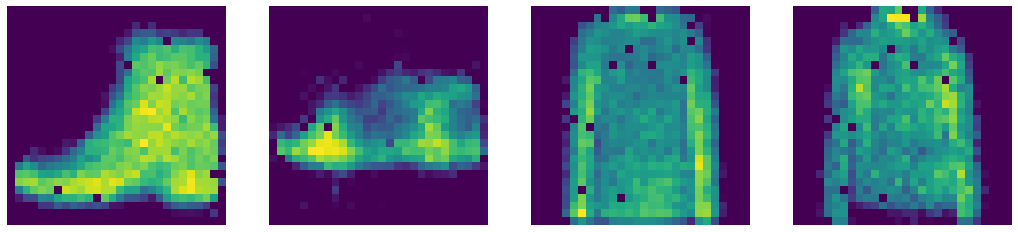

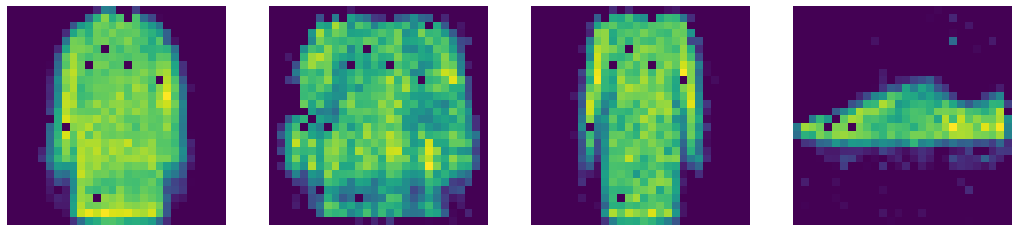

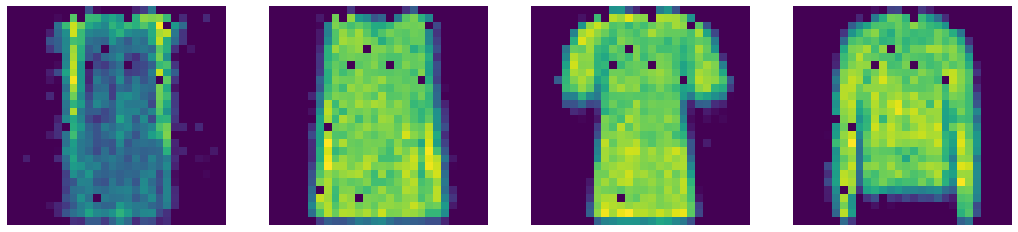

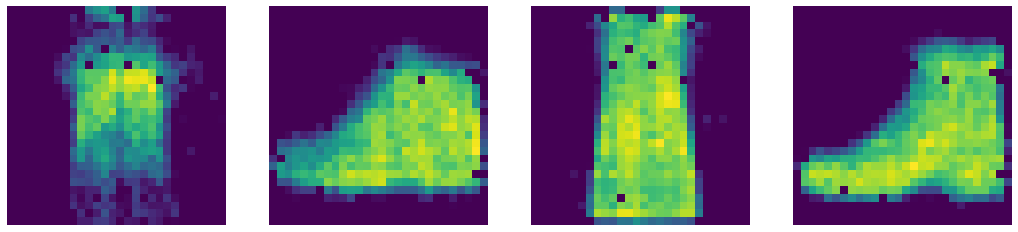

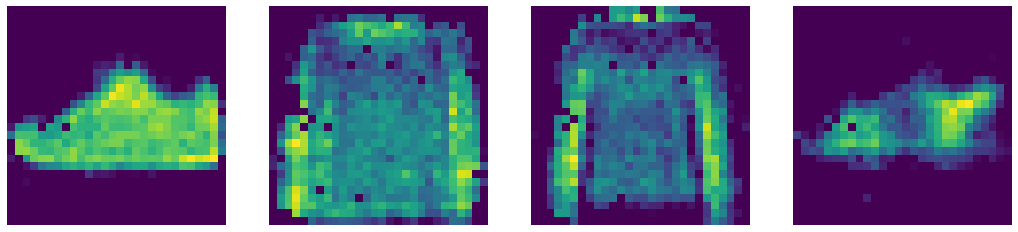

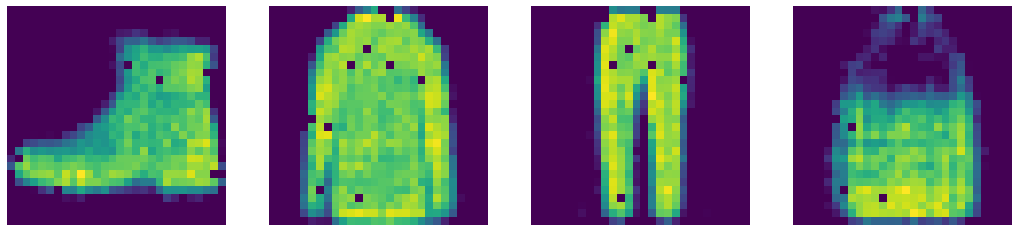

In [8]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [10]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

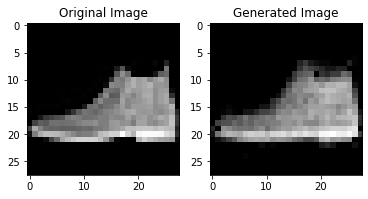

In [11]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

## Exercise 1.

In [12]:
class CNN_AutoEncoder(nn.Module):
    def __init__(self):
        super(CNN_AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3 ),
                                    nn.LeakyReLU(),
                                    
                                    nn.Conv2d(16, 8, kernel_size=3),
                                    nn.LeakyReLU())
       
        self.decoder = nn.Sequential(nn.ConvTranspose2d(8, 16,  kernel_size = 3),
                                     nn.LeakyReLU(),
                                     nn.ConvTranspose2d(16, 1, kernel_size= 3),
                                     nn.LeakyReLU())
                                     
    
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [13]:
model_1 = CNN_AutoEncoder()

In [14]:
model_1

CNN_AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
  )
)

In [15]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_1.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0123
epoch [2/10], loss:0.0055
epoch [3/10], loss:0.0028
epoch [4/10], loss:0.0020
epoch [5/10], loss:0.0018
epoch [6/10], loss:0.0015
epoch [7/10], loss:0.0014
epoch [8/10], loss:0.0013
epoch [9/10], loss:0.0012
epoch [10/10], loss:0.0012


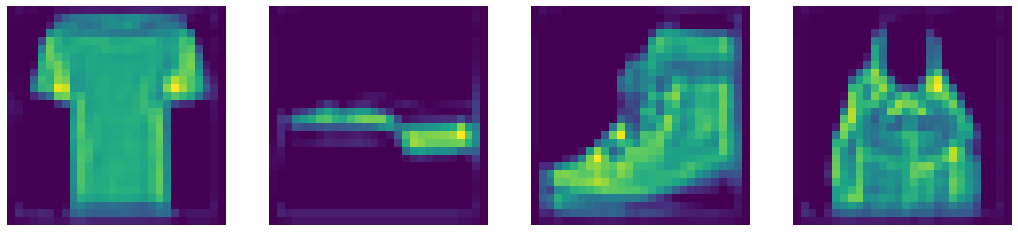

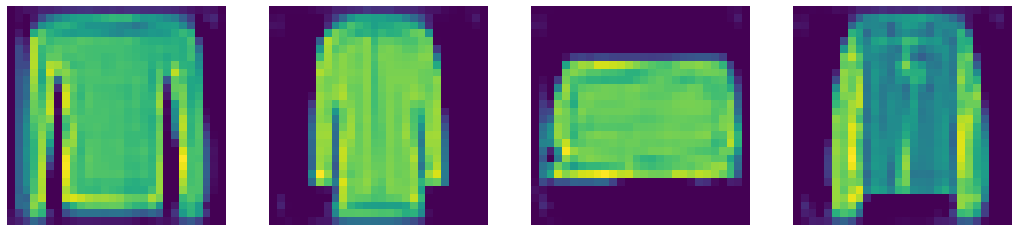

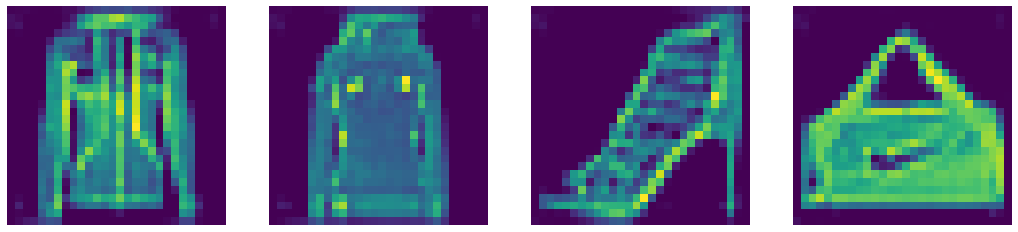

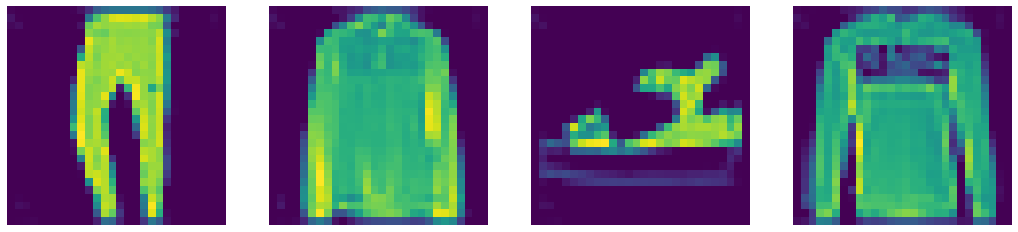

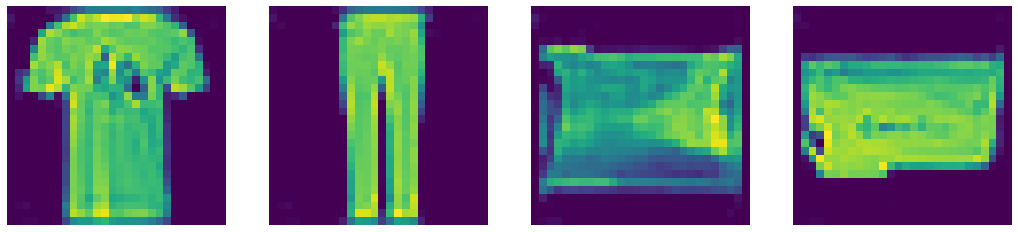

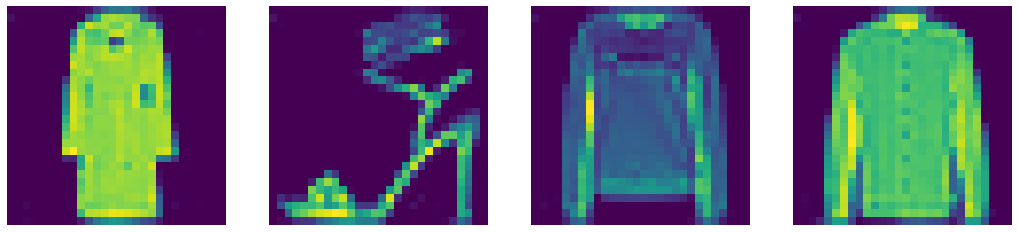

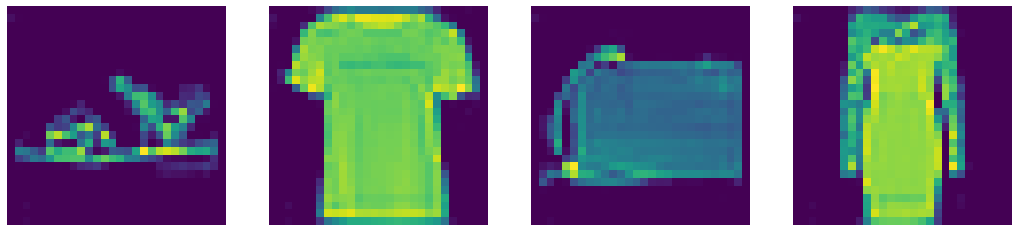

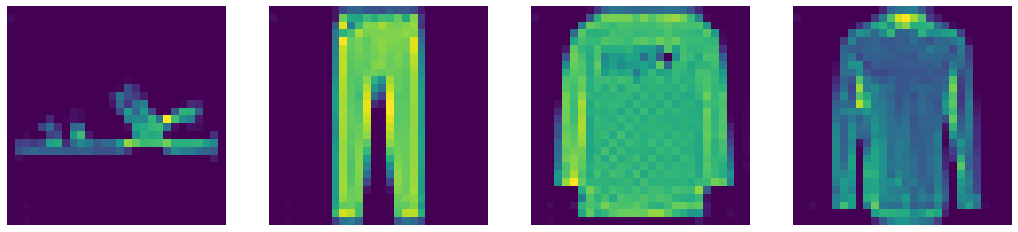

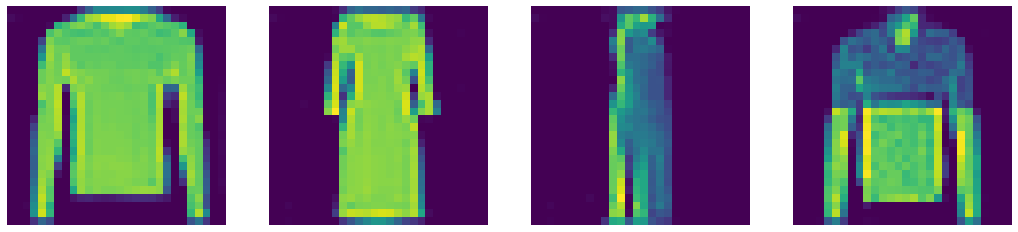

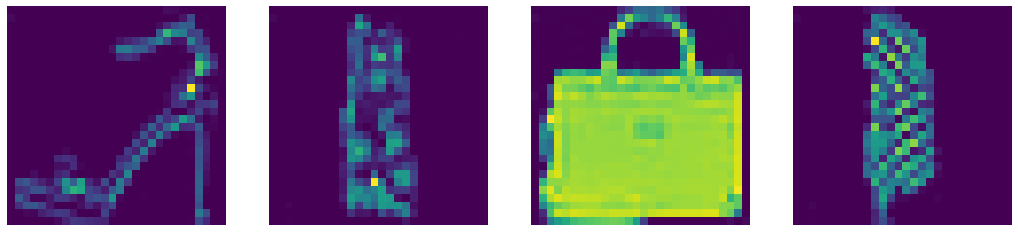

In [16]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        output = model_1(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [17]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

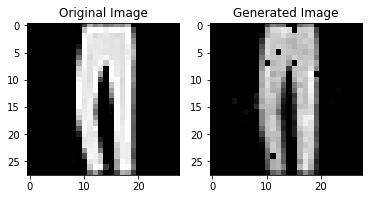

In [18]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[2].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[2].cpu().detach(), cmap='gray')
plt.show()

## Exercise 3
### Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder


The performance of CNN_Autoencoder is that the error is very small (loss) compared to the fully connected and  also the images generated are clear than the one generated using the fully connected. 

## Exercise 2
### Edit the code above for denoising autoencoder? (bonus point if your code it)


In [40]:
bs = 20 #batch_size

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
train_loader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=0)

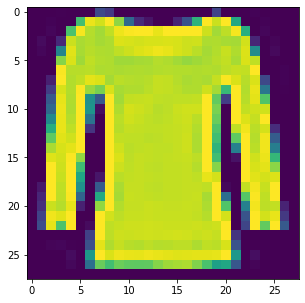

In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img)

In [61]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvDenoiser(nn.Module):
    def __init__(self):
        super(ConvDenoiser, self).__init__()
        # encoder layers #
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  
        self.conv2 = nn.Conv2d(32, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        # transpose layer to increase the spatial dimension of the image output
        self.t_conv1 = nn.ConvTranspose2d(8, 8, 3, stride=2)  
        self.t_conv2 = nn.ConvTranspose2d(8, 16, 2, stride=2)
        self.t_conv3 = nn.ConvTranspose2d(16, 32, 2, stride=2)
        self.conv_out = nn.Conv2d(32, 1, 3, padding=1)


    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)  
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        x = F.sigmoid(self.conv_out(x))
                
        return x

In [62]:
model = ConvDenoiser()
print(model)

ConvDenoiser(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(2, 2))
  (t_conv2): ConvTranspose2d(8, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv3): ConvTranspose2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
  (conv_out): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [63]:
## loss function and optimizer

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [64]:
## Training

# number of epochs 
n_epochs = 10

# for adding noise to images
noise_factor=0.5
for epoch in range( 1,n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    for data in train_loader:
        images, _ = data
        
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        optimizer.zero_grad()
        outputs = model(noisy_imgs)
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch,train_loss))

Epoch: 1 	Training Loss: 0.743701
Epoch: 2 	Training Loss: 0.527604
Epoch: 3 	Training Loss: 0.495628
Epoch: 4 	Training Loss: 0.477163
Epoch: 5 	Training Loss: 0.465035
Epoch: 6 	Training Loss: 0.457739
Epoch: 7 	Training Loss: 0.452504
Epoch: 8 	Training Loss: 0.448330
Epoch: 9 	Training Loss: 0.444817
Epoch: 10 	Training Loss: 0.443059


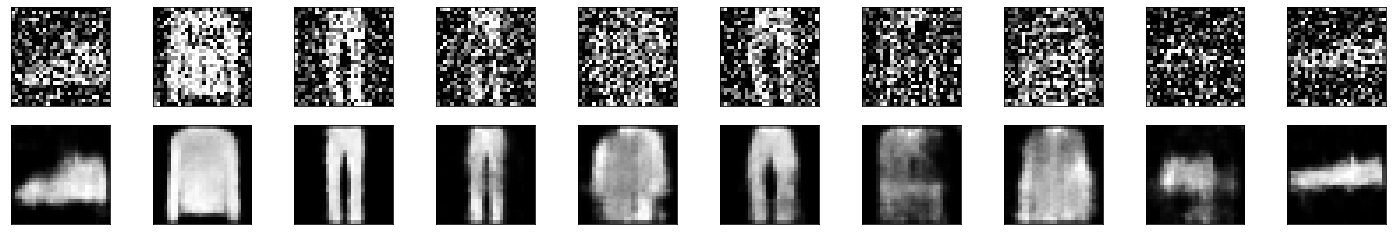

In [65]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

# get sample outputs
output = model(noisy_imgs)
# prep images for display
noisy_imgs = noisy_imgs.numpy()

# output is resized into a batch of iages
output = output.view(bs, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for noisy_imgs, row in zip([noisy_imgs, output], axes):
    for img, ax in zip(noisy_imgs, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)